In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv(r"C:\Users\HP\Downloads\archive (17)\heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

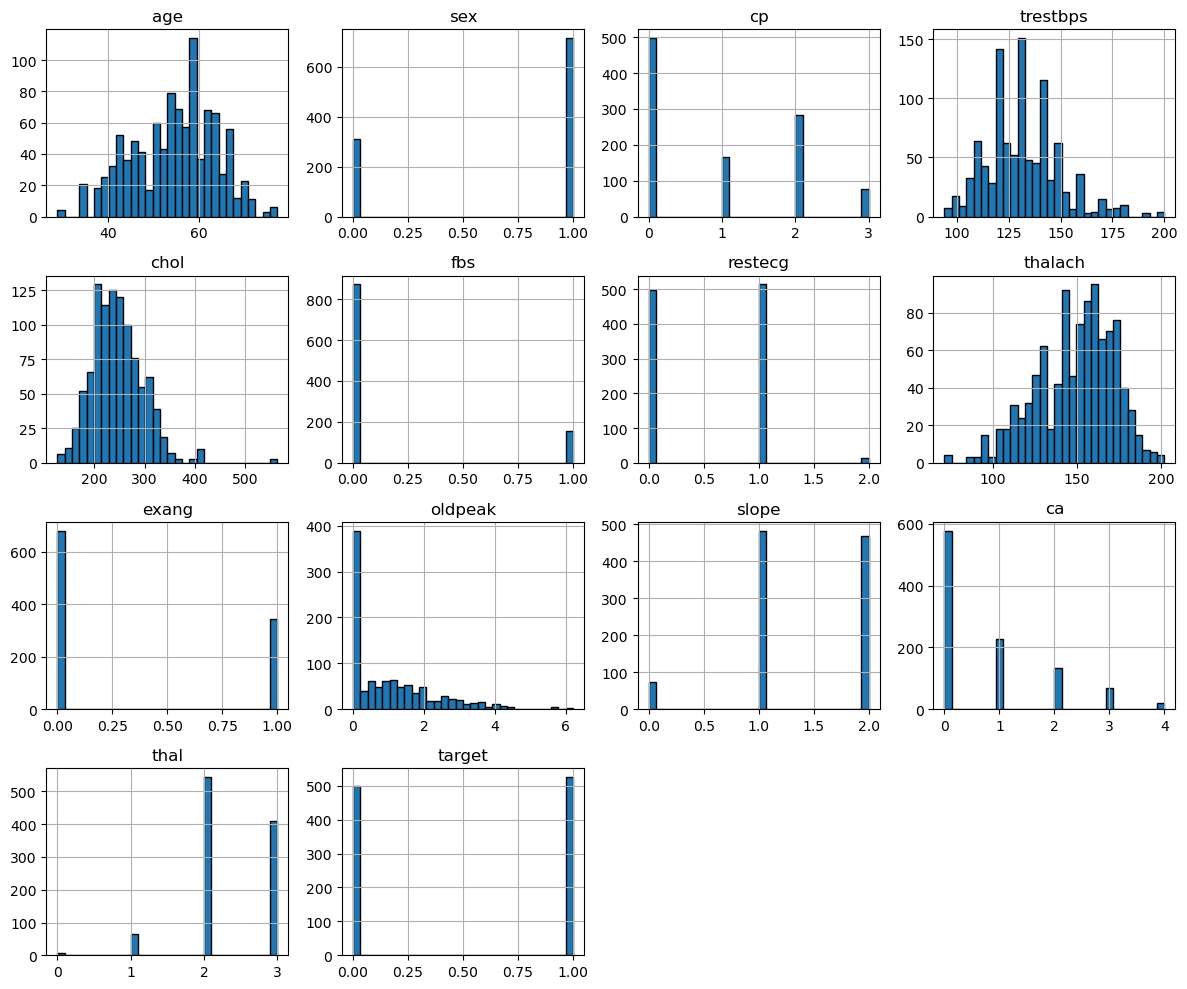

In [ ]:
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.tight_layout()
plt.savefig("histogram for all numeric columns.png")

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
X=df.drop('target',axis=1)
y=df['target']

In [ ]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
#Normalizing
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X=ms.fit_transform(X)
X

array([[0.47916667, 1.        , 0.        , ..., 1.        , 0.5       ,
        1.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.85416667, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.375     , 1.        , 0.        , ..., 0.5       , 0.25      ,
        0.66666667],
       [0.4375    , 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.52083333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ]])

In [ ]:
y=y.values

In [ ]:
#Splitting Data into Training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=52)

In [ ]:
X_train

array([[0.85416667, 1.        , 0.66666667, ..., 0.5       , 0.25      ,
        1.        ],
       [0.64583333, 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.77083333, 0.        , 1.        , ..., 0.        , 0.        ,
        0.66666667],
       ...,
       [0.10416667, 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.        , 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.60416667, 1.        , 0.        , ..., 0.        , 0.75      ,
        0.33333333]])

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
#Validation score
from sklearn.model_selection import cross_val_score
valid=cross_val_score(sv,X,y,cv=3)
print(valid)

[0.90350877 0.88888889 0.85043988]


In [ ]:
X_test

array([[0.6875    , 0.        , 0.66666667, ..., 0.5       , 0.25      ,
        1.        ],
       [0.60416667, 0.        , 0.33333333, ..., 1.        , 0.5       ,
        0.66666667],
       [0.47916667, 1.        , 0.        , ..., 0.5       , 0.        ,
        0.        ],
       ...,
       [0.47916667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.54166667, 0.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.77083333, 0.        , 0.66666667, ..., 0.5       , 0.25      ,
        0.66666667]])

In [ ]:
y_pred2=sv.predict(X_test)
y_pred2

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print('Accuracy ',accuracy_score(y_test,y_pred2))
print('Precision ',precision_score(y_test,y_pred2))
print('recall ',recall_score(y_test,y_pred2))
print('F1 score ',f1_score(y_test,y_pred2))

Accuracy  0.8829268292682927
Precision  0.8623853211009175
recall  0.912621359223301
F1 score  0.8867924528301887
